# Project Introduction : Analyzing Crime in Los Angeles

This project aims to investigate and analyze crime in Los Angeles over the years using the pandas, numpy, seaborn, and matplotlib libraries. By exploring the crimes.csv dataset, we will gather insights and answer the following questions:

1. Which hour has the highest frequency of crimes?
   - To find the answer, we will analyze the timestamps of each crime and determine the hour with the most occurrences.
   - The result will be stored as an integer variable called `peak_crime_hour`.

2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
   - We will examine the location data of each crime and identify the area with the highest number of night crimes.
   - Night crimes are defined as those committed between 10pm and 3:59am.
   - The answer will be saved as a string variable called `peak_night_crime_location`.

3. Identify the number of crimes committed against victims of different age groups.
   - We will analyze the victim data in the dataset and categorize them into different age groups: "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+".
   - For each age group, we will count the frequency of crimes committed against victims in that group.
   - The results will be saved as a pandas Series called `victim_ages`, with the age group labels as the index and the frequency of crimes as the values.

By analyzing the dataset and answering these questions, we aim to gain insights into crime patterns and demographics in Los Angeles. This information can be valuable for understanding and addressing crime-related issues in the city.

#### Importing required Libraries


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Importing Dataset crime.csv

##### Importing Dataset

In [22]:
crimes = pd.read_csv("/content/crime.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
print(crimes.head())

<ipython-input-22-c60b599df338>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("/content/crime.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
<ipython-input-22-c60b599df338>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("/content/crime.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})


       DR_NO  Date Rptd   DATE OCC TIME OCC  AREA   AREA NAME  Rpt Dist No  \
0    1307355 2010-02-20 2010-02-20     1350     13     Newton         1385   
1   11401303 2010-09-13 2010-09-12     0045     14    Pacific         1485   
2   70309629 2010-08-09 2010-08-09     1515     13     Newton         1324   
3   90631215 2010-01-05 2010-01-05     0150      6  Hollywood          646   
4  100100501 2010-01-03 2010-01-02     2100      1    Central          176   

   Part 1-2  Crm Cd                                        Crm Cd Desc  ...  \
0         2     900                           VIOLATION OF COURT ORDER  ...   
1         2     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   
2         2     946                          OTHER MISCELLANEOUS CRIME  ...   
3         2     900                           VIOLATION OF COURT ORDER  ...   
4         1     122                                    RAPE, ATTEMPTED  ...   

  Status   Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm C

# Plot to find the largest frequency of crimes by hour

<ipython-input-24-423479a0555b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crimes, x="HOUR OCC", palette="viridis")


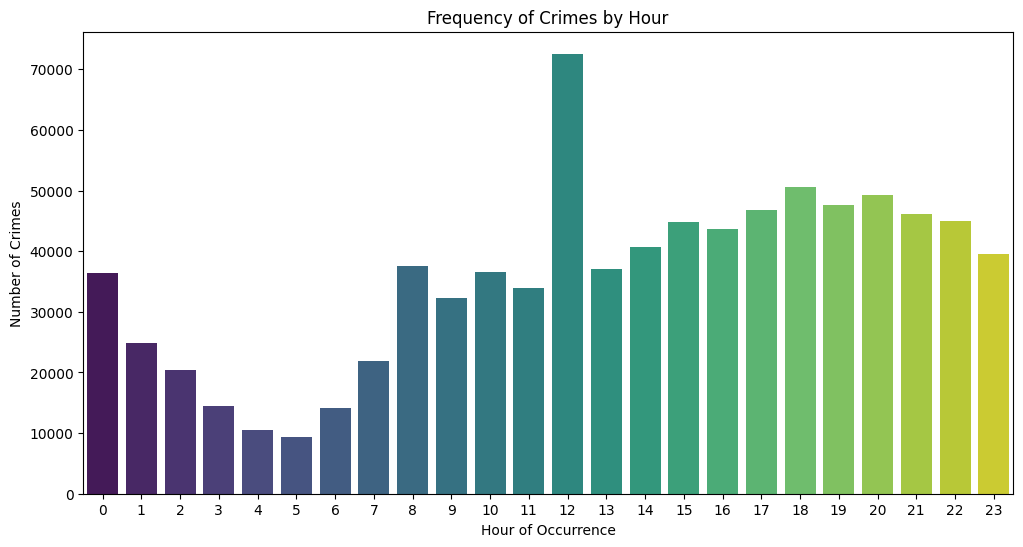

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x="HOUR OCC", palette="viridis")
plt.title("Frequency of Crimes by Hour")
plt.xlabel("Hour of Occurrence")
plt.ylabel("Number of Crimes")
plt.xticks(range(24))
plt.show()

# Filter for night-time hours (10pm to 3:59am)


In [26]:
night_time = crimes[crimes["HOUR OCC"].isin([22, 23, 0, 1, 2, 3])]


# Group by "AREA NAME" and count occurrences

In [27]:
night_crimes_by_area = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count()
peak_night_crime_location = night_crimes_by_area.sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")


The area with the largest volume of night crime is 77th Street


# Visualize night crimes by area


<ipython-input-28-9bbe34d4d0e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=night_crimes_by_area, x="AREA NAME", y="HOUR OCC", palette="viridis")


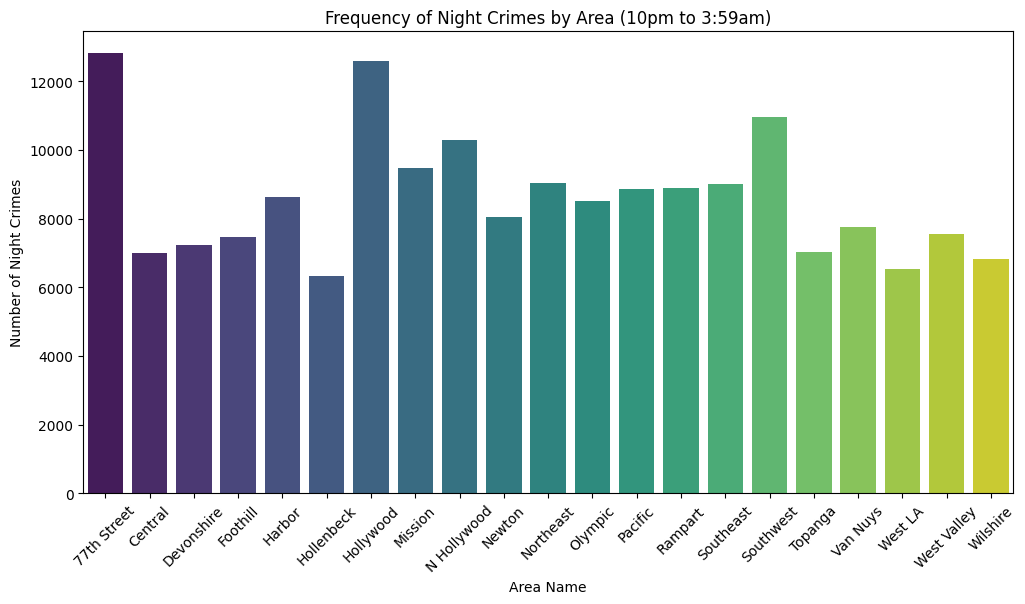

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=night_crimes_by_area, x="AREA NAME", y="HOUR OCC", palette="viridis")
plt.title("Frequency of Night Crimes by Area (10pm to 3:59am)")
plt.xlabel("Area Name")
plt.ylabel("Number of Night Crimes")
plt.xticks(rotation=45)
plt.show()

# Create bins and labels for victim age ranges


In [29]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]



# Add a new column for age brackets


In [30]:
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)


# Count the number of crimes committed against each age group


In [31]:
victim_ages = crimes["Age Bracket"].value_counts().sort_index()
print(victim_ages)

Age Bracket
0-17      50524
18-25    134230
26-34    158335
35-44    142511
45-54    118710
55-64     68772
65+       42854
Name: count, dtype: int64


# Visualize the number of crimes committed against each age group


<ipython-input-32-476789c2bf5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victim_ages.index, y=victim_ages.values, palette="viridis")


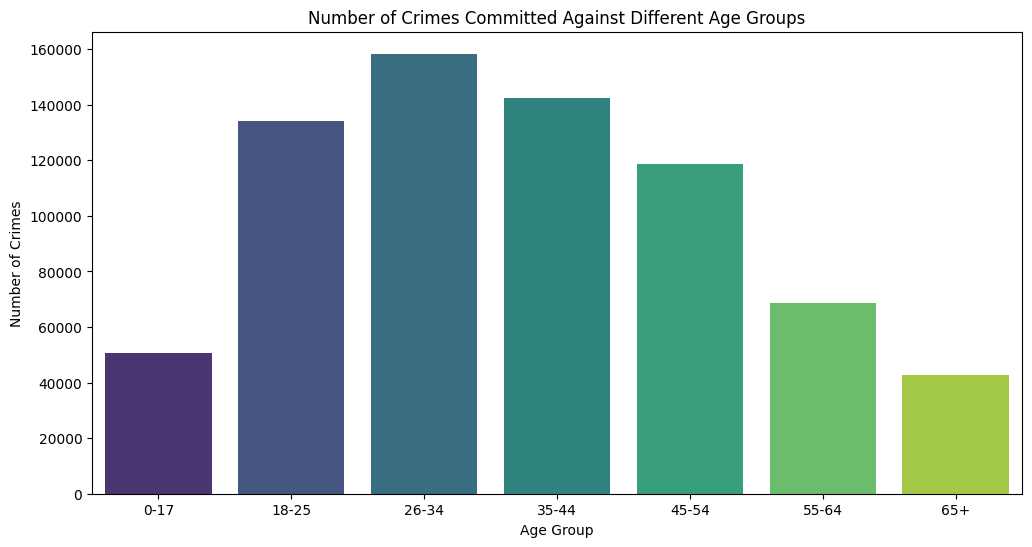

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette="viridis")
plt.title("Number of Crimes Committed Against Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.show()